# Tasks

Machine Learning and Statistics

Winter 2023/2024

By Sadie Concannon

***

## Task 1 - Newton's Method to calculate square root
***

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without
using the power operator or a package.

> Rather, you should use Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i − \frac{z_i × z_i − x}{2z_i} $$

In [133]:
#As per notes in lecture

def sqrt(x):
    # Starting with an initial guess for the square root.
    z = x / 4.0

    # Loop as this is an iterative approach until we are accurate within 0.01.
    #while (z could be improved):
    for i in range (100):
        # Newtons method for a better approximation
        z = z - (((z * z) - x) / (2 * z))

    # z should now be a good approximation for the square root
    return z

In [134]:
# Test the function on 3.
sqrt(3)

1.7320508075688774

In [135]:
# Using another method

# Writing a function that includes parameters
# x = the number for which to find the square root
# z = initial guess (set to 1.0)
# tol = the desired accuracy of the approximation (set to 10 decimal places)
# max_iterations = max number of iterations (set to 100)

def sqrt2(x, z=1, tol=1e-10, max_iteratons=100):
    iteration = 0
             
    while abs(z*z - x)>tol and iteration < max_iteratons:
        z = 0.5 * (z + x / z) #re arrange the formula
        iteration += 1
     
    return z

x=3
result = sqrt2(x)

result

1.7320508075688772

In [136]:
#Compare with Python
3**0.5  

1.7320508075688772

The results match. The sqrt2 function is closer aligned to Python. The Newton-Raphson method (also known as Newton's method) is a way to quickly find a good approximation for the root of a real-valued function $f(x)=0$. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it.


#### Notes

***

1. The calculation $z^2 - x$ is exactly zero when $z$ is the square root of $x$. It is greater than zero when $z$ is too big. It is less than zero when $z$ is too small. Thus $(z^2 - x)^2$ is a good candidate for a cost function.

2. The derivative of the numerator $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question.

***

## Task 2 - Chi Square Test
***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use `scipy.stats` to perform a `chi-squared test` to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.
<table style="width:100%">
    <tr>
        <th colspan ="2" rowspan="2">&nbsp;</th>
        <th colspan="2">Biscuit</th>
    </tr>
    <tr>
        <td><i>Chocolate</i></td>
        <td><i>Plain</i></td>
    </tr>
    <tr>
        <th rowspan ="2">Drink</th>
        <td><i>Coffee</i></td>
        <td>43 </td>
        <td>57 </td>
    </tr>
    <tr>
        <td><i>Tea</i></td>
        <td>56 </td>
        <td>45 </td>
    </tr>
</table>

 


#### 1. Prepare the data frame

In [137]:
# Chi-square test is a test of independence of variables in a contingency table 
# and is used to discover if there is a relationship between two categorical variables.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Data Frames
import pandas as pd
import numpy as np

# Shuffle
import random

# Statistics
import scipy.stats as ss
from scipy.stats.contingency import crosstab

In [138]:
# creating the raw data, followed method in lecture
coffee_chocolate = [['coffee','chocolate']]*43
coffee_plain = [['coffee','plain']]*57
tea_chocolate = [['tea','chocolate']]*56
tea_plain = [['tea','plain']]*45

raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain
random.shuffle(raw_data)

drink, biscuit = list(zip(*raw_data))


In [139]:
#Create the data frame
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

df

,drink,biscuit
0,tea,chocolate
1,tea,chocolate
2,coffee,chocolate
3,coffee,plain
4,coffee,plain
...,...,...
196,tea,chocolate
197,coffee,plain
198,tea,chocolate
199,tea,chocolate


#### 2. Chi Square Contingency Table

##### Present the data set and perform the statistics

In [140]:
# Perform Cross Tabulation contingency
cross = ss.contingency.crosstab(df['drink'],df['biscuit'])

cross
#This result is just counting the unique values in the array

((array(['coffee', 'tea'], dtype=object),
  array(['chocolate', 'plain'], dtype=object)),
 array([[43, 57],
        [56, 45]]))

In [141]:
# To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies.
# https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d

crosstab= pd.crosstab(df['drink'], df['biscuit']) 
crosstab

biscuit,chocolate,plain
drink,,
coffee,43,57
tea,56,45


In [142]:
# To get table by percentage preference
contigency_pct = pd.crosstab(df['drink'], df['biscuit'], normalize='all')
contigency_pct

biscuit,chocolate,plain
drink,,
coffee,0.213930,0.283582
tea,0.278607,0.223881


In [143]:
crosstab.count

<bound method DataFrame.count of biscuit  chocolate  plain
drink                    
coffee          43     57
tea             56     45>

##### Perform the test for independence

In [144]:
#using scipy stats do Chi2 Test for Independence
chi2, p, dof, expected = ss.chi2_contingency(crosstab, correction=False)

chi2, p, dof, expected


(3.113937364324669,
 0.07762509678333357,
 1,
 array([[49.25373134, 50.74626866],
        [49.74626866, 51.25373134]]))

In [145]:
chi2, p, dof, expected = ss.chi2_contingency(crosstab, correction=False)
expected

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

##### Calculating the Chi2

In [146]:
chi2

3.113937364324669

In [147]:
#Calculate the difference from expected frequency
CC=43-49.25373134
CP=57-50.74626866
TC=56-49.74626866
TP=45-51.25373134

CC, CP, TC, TP

(-6.253731340000002, 6.253731340000002, 6.253731340000002, -6.253731340000002)

In [148]:
CC2=(CC**2)/49.25373134
CP2=(CP**2)/50.74626866
TC2=(TC**2)/49.74626866
TP2=(TP**2)/51.25373134

CHI2Hand=(CC2 + CP2 + TC2 + TP2)
CHI2Hand

3.1139373610547243

In [149]:
Check = chi2-CHI2Hand
Check

3.269944759409782e-09

#### 3. Interpret the Results
The first value (3.114) is the Chi-square value, and then the P-Value is 0.07762509678333357 or 0.078 rounded to 3 decimal places, then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. If the significance level is 10% and the p-value is lower than this amount, this means that we can accept the null hypothesis with 90% confidence so we can take any p-value <0.1%. We can reject the null hypothesis as the p-value is less than 0.08 and therefore determine that there is no direct correlation between a preference to either a chocolate or plain biscuit dependent on whether the consumer has tea or coffee as their drink of choice. Since all the expected frequency are all $\frac{+}{}6.25$ the results can be relied upon.


*https://www.docpid.com/calculators/p-value#*

## Task 3 - T Test
***

Perform a `t-test` on the famous penguins data set to investigate whether there is evidence of a significant difference in the body
mass of male and female gentoo penguins.

In [151]:
#Use seaborn library to access the penguins data set.
import seaborn as sns
from scipy.stats import ttest_ind

#Loading the penguins data set.
penguins = sns.load_dataset('penguins')

#Filter for Gentoo penguins.
gentoo_data=penguins[penguins['species'] == 'Gentoo']

#Separate the data for the male and female Gentoo penguins.
male_data=gentoo_data[gentoo_data['sex'] == 'Male']['body_mass_g']
female_data=gentoo_data[gentoo_data['sex'] == 'Female']['body_mass_g']


In [156]:
#Perform t-test

t_stat, p_value = ttest_ind(male_data, female_data, equal_var=False)

#Display results
(f'T-statistic:{t_stat} P-value: {p_value}')


'T-statistic:14.761368414543291 P-value: 1.8677596749117468e-28'

In [159]:
#Interpret the results
if p_value < 0.1:
    print('There is significant evidence of a difference in body mass between male and female Gentoo penguins.')
else: 
    print('There is no significant evidence of a difference in body mass between male and female Gentoo penguins.')

There is significant evidence of a difference in body mass between male and female Gentoo penguins.


#### Interpret the results

The t-test results provide information on whether there is a statistically significant difference in the body mass between male and female Gentoo pengiuns. The t-statistic measures the size of the difference relative to the variation in the data, and the p-value indicates the probability of observing such a difference by chance. 
*https://www.learntocalculate.com/calculate-p-value-from-t/*

Given the low value of the p-value it suggest we can reject the null hypothesis. If the significance level is 10% and the p-value is lower than this amount, this means that we can accept the null hypothesis with 90% confidence so we can take any p-value <0.1%. In this context rejecting the null hypothesis means there is a significant difference in body mass between male and female Gentoo penguins.
*https://www.docpid.com/calculators/p-value*

However, the t-test doesn't provide information about the difference i.e. which group is heavier - the males or the females? We would need to carry out further statistical analysis to gain insights into the distribution of the body mass of each group.






#### Further Analysis
****

In [161]:
#Descriptive statistics

male_stats = male_data.describe()
female_stats = female_data.describe()



In [162]:
male_stats

count      61.000000
mean     5484.836066
std       313.158596
min      4750.000000
25%      5300.000000
50%      5500.000000
75%      5700.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [163]:
female_stats

count      58.000000
mean     4679.741379
std       281.578294
min      3950.000000
25%      4462.500000
50%      4700.000000
75%      4875.000000
max      5200.000000
Name: body_mass_g, dtype: float64

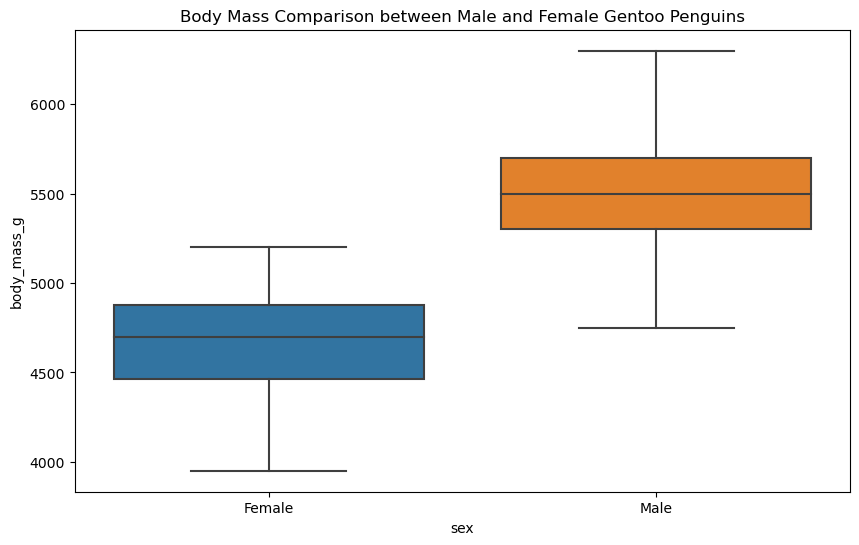

In [164]:
# Box Plot for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='body_mass_g', data=gentoo_data)
plt.title ('Body Mass Comparison between Male and Female Gentoo Penguins')
plt.show()


#### what more does this tell us

Firsty the visual can instantly tell us our `t-test result` was correct and there there is a significant difference in body mass between male and female Gentoo penguins. Using the `describe` function we could see there was a difference in the mean weights of the groups with the male group have a hhigher mean by $805g$.

Looking further at our `box plot` we can visually see this mean line (inside the box) is inline with what we got in the `describe` function. As the lines are at very different heights it further supports our conclusion that there is a significant difference in the weights of male compared to female Gentoo penguins. The boxes themselves are a similar width so we know the data sizes for each gender are close (61 Male & 58 female). The whiskers do not suggest there are any significant outliers which could skew the hypothesis.

Doing this additional statistical analysis has complemented the `t-test` and provides further understanding of the data set.

## Task 4 - Iris Data Set
***

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. 
Provide evidence for your answer.


## Task 5 - Principal Component Analysis
***

Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. 
Explain the purpose of the analysis and your results.

***
## End